In [ ]:
from utils.plotting import *

In [ ]:
def model(x, p):
    return x ** (2 * p + 1) / (1 + x ** (2 * p))

pparam = dict(xlabel='Voltage (mV)', ylabel=r'Current ($\mu$A)')

x = np.linspace(0.75, 1.25, 201)

fig, ax = plt.subplots()
for p in [10, 15, 20, 30, 50, 100]:
    ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.autoscale(tight=True)
    ax.set(**pparam)

In [ ]:
titanic = sns.load_dataset('titanic')
sns.boxplot(data=titanic, x="age", y="class")

In [ ]:
import colorlog, logging

class Formatter(colorlog.ColoredFormatter):

	last_log = 0
	levels = {
		'DEBUG' : "DBG",
		"INFO" : "INF",
		"WARNING" : "WRN",
		"ERROR" : "ERR",
		"CRITICAL" : "CRIT"
	}

	def format(self, record):
		delta_milliseconds = record.relativeCreated - self.last_log
		self.last_log = int(record.relativeCreated)
		record.relativeCreated = f"+{int(delta_milliseconds)}ms"
		record.levelno = f"[{self.levels[record.levelname]}]"
		return super().format(record)

formatter = Formatter(
    # "%(log_color)s%(asctime)s - %(name)s - %(levelname)s - %(message)s (%(filename)s:%(lineno)d)",
    f'{{log_color}}{{asctime}} {{levelno}} {{name}}{{reset}} -- {{msg}} ({{bold_purple}}{{relativeCreated}}{{reset}})',
    # "%(log_color)s%(levelname)-8s%(reset)s %(blue)s%(message)s"
    datefmt='%H:%M:%S',
	reset=True,
	log_colors={
		'DEBUG':    'bold_cyan',
		'INFO':     'bold_white',
		'WARNING':  'bold_yellow',
		'ERROR':    'bold_red',
	},
	secondary_log_colors={},
	style='{'
)

# create logger with 'spam_application'
logger = logging.getLogger("My_app")
logger.setLevel(logging.DEBUG)

# create console handler with a higher log level
ch = logging.StreamHandler()
ch.setLevel(0)

ch.setFormatter(formatter)

logger.addHandler(ch)

In [ ]:
logger.debug('test 0')
time.sleep(1)
logger.info('test 1')
logger.warning('test 2')
logger.error('test 3')

In [ ]:
from utils.plotting import *

In [ ]:
plotting_logger.critical('test_utils.ipynb')
testing_logger.critical('test_utils.ipynb')

In [ ]:
plotting.__test_box_series()

In [ ]:
import numpy as np
from time import perf_counter_ns
from itertools import permutations


def c_(arr):
    return np.c_[arr, arr]

def stack(arr):
    return np.stack([arr, arr]).T

def vstac(arr):
    return np.vstack([arr, arr]).T

def column_stack(arr):
    return np.column_stack([arr, arr])

def concatenate(arr):
    return np.concatenate([arr[:, None], arr[:, None]], axis=1)

In [ ]:
from typing import Iterable

def time_performance(kernels : Iterable[callable], input : callable, n_range : Iterable[int], repeat : int = 10, skip_verification : bool = False) -> dict : 

    performances = {str(kernel).split()[1] : [] for kernel in kernels}
    for n in n_range:
        input_value = input(n)
        results = []

        for kernel in kernels:
            runtime = 0
            for _ in range(repeat - 1):
                start = perf_counter_ns()
                kernel(input_value)
                runtime += (perf_counter_ns() - start) / repeat
            
            start = perf_counter_ns()
            result = kernel(input_value)
            runtime += (perf_counter_ns() - start) / repeat
            performances[str(kernel).split()[1]].append(runtime)
            results.append(result)

        if not skip_verification:
            for a, b in permutations(results, 2):
                try:
                    if a != b: raise ValueError('Kernels do not produce the same results')
                except ValueError:
                    if (a != b).all(): raise ValueError('Kernels do not produce the same results')
        
    return performances

In [ ]:
runtimes = time_performance([way1, way2, way3, way4, way5], np.random.rand, [2**k for k in range(20)])

In [ ]:
for line in runtimes:
    plt.plot([2**k for k in range(20)], line)

plt.loglog()

In [ ]:
test = lambda x: x*x

In [ ]:
str(test)

In [ ]:
print(runtimes)

In [1]:
from utils.plotting import *

22:07:13 [INFO] utils.testing  -- import logging                                                                                       (+14227ms)
22:07:13 [INFO] utils.testing  -- import re                                                                                            (+2ms)
22:07:13 [INFO] utils.testing  -- import testing.tools as testing                                                                      (+3ms)
22:07:13 [INFO] utils.plotting -- import numpy as np                                                                                   (+14396ms)
22:07:14 [INFO] utils.plotting -- import pandas as pd                                                                                  (+348ms)
22:07:14 [INFO] utils.plotting -- import matplotlib.pyplot as plt                                                                      (+467ms)
22:07:15 [INFO] utils.plotting -- import seaborn as sns                                                                                (

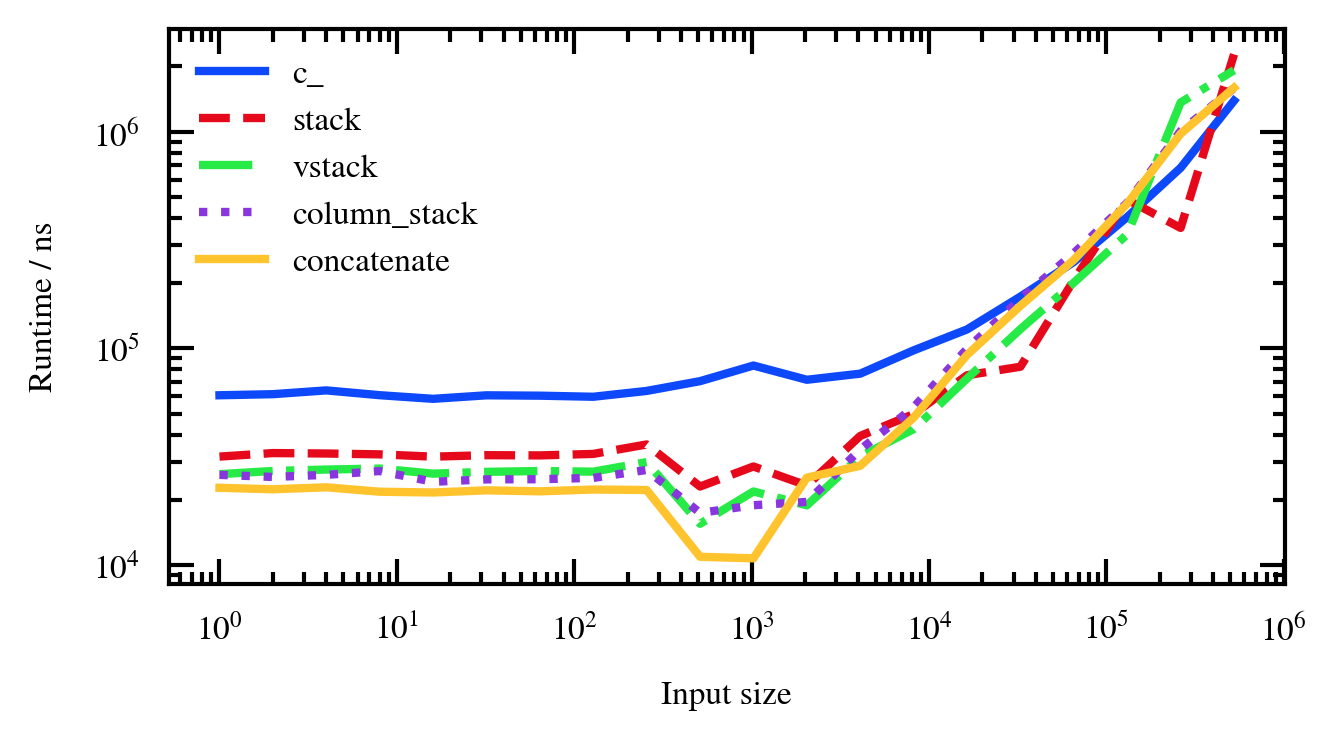

In [2]:
def c_(arr):
    return np.c_[arr, arr]

def stack(arr):
    return np.stack([arr, arr]).T

def vstack(arr):
    return np.vstack([arr, arr]).T

def column_stack(arr):
    return np.column_stack([arr, arr])

def concatenate(arr):
    return np.concatenate([arr[:, None], arr[:, None]], axis=1)

plotting.performance_plot([c_, stack, vstack, column_stack, concatenate], np.random.rand, [2**k for k in range(20)])

In [ ]:
__test_performance_plot()

In [ ]:
plt.plot()